# I. Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
org_report = pd.read_csv('/content/drive/MyDrive/KPMG.csv')

# II. Data Cleaning & Processing

In [ ]:
org_report.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0


In [ ]:
org_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  object 
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.0+ MB


In [ ]:
org_report['transaction_date'] = pd.to_datetime(org_report['transaction_date'], format='%d/%m/%Y')

In [ ]:
report = org_report[(org_report['order_status'] == 'Approved')]

In [ ]:
report.describe()

,transaction_id,product_id,customer_id,transaction_date,product_first_sold_date
count,19821.000000,19821.000000,19821.000000,19821,19625.000000
mean,10006.222794,45.343878,1738.485899,2017-07-01 11:46:35.762070528,38200.723312
min,1.000000,0.000000,1.000000,2017-01-01 00:00:00,33259.000000
25%,5003.000000,18.000000,858.000000,2017-04-01 00:00:00,35667.000000
50%,10008.000000,44.000000,1735.000000,2017-07-03 00:00:00,38216.000000
75%,15010.000000,72.000000,2613.000000,2017-10-02 00:00:00,40672.000000
max,20000.000000,100.000000,5034.000000,2017-12-30 00:00:00,42710.000000
std,5774.215708,30.760892,1011.981306,NaN,2875.806910


In [ ]:
report.isnull().sum()

,0
transaction_id,0
product_id,0
customer_id,0
transaction_date,0
online_order,354
order_status,0
brand,196
product_line,196
product_class,196
product_size,196


In [ ]:
report.nunique()

,0
transaction_id,19821
product_id,101
customer_id,3493
transaction_date,364
online_order,2
order_status,1
brand,6
product_line,4
product_class,3
product_size,3


In [ ]:
clear_report = report.drop_duplicates()
clear_report = report.dropna(subset=['customer_id'])

Conclusion:
- Missing Data:
  - No missing data in primal key (transaction_id) and transaction_date
> **Next Step: Remove Missing Values**
- Duplicates:
  - 179 values in primal key (transaction_id)
> **Next Step: Remove Duplicate Values**
- Incorrect Data Type:
  - transaction_date: object -> datetime64
> **Next Step: Change Data Type**
- Incorrect Value:
  - No incorrect value found
> **Next Step: No Action**

# III. Cohort Analysis

## 1. Calculate Cohort Month:

In [ ]:
clear_report['OrderMonth'] = clear_report['transaction_date'].dt.to_period('M')
clear_report['CohortMonth'] = clear_report.groupby('customer_id')['OrderMonth'].transform('min')
clear_report.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,OrderMonth,CohortMonth
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0,2017-02,2017-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0,2017-05,2017-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0,2017-10,2017-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0,2017-08,2017-02
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0,2017-10,2017-01


## 2. Cohort Calculation:

In [ ]:
def calculate_month_difference(row):
    return (row['OrderMonth'].year - row['CohortMonth'].year) * 12 + (row['OrderMonth'].month - row['CohortMonth'].month)
clear_report['CohortIndex'] = clear_report.apply(calculate_month_difference, axis=1)

In [ ]:
cohort_data = clear_report.groupby(['CohortMonth', 'CohortIndex'])['customer_id'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='customer_id')
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

## 3. Cohort Map Visualization:

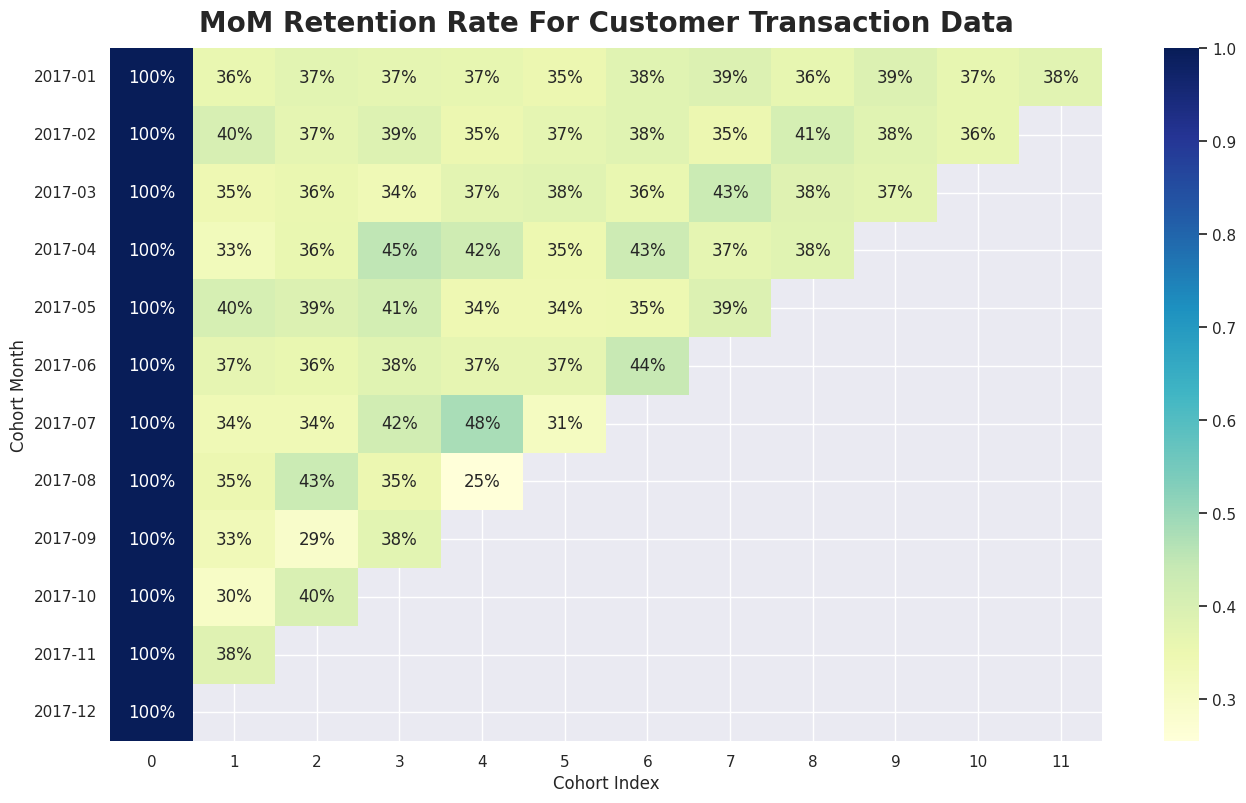

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16, 9))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title('MoM Retention Rate For Customer Transaction Data', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.show()

# IV. Insights & Recommendations

## 1. Overall Analysis:

- Eloton, a prominent player in the connected fitness segment of the bicycle industry, reported aretention rate of 94% in 2019, according to *observe.com*.
- In the overall bicycle industry, monthly customer retention rates vary by company, but mostly ranging between 60% and 80% (*finmodelslab.com*).
- Based on these statistics, it can be seen that KPMG has a considerable **low monthly retention rate** than the industrial benchmark, with only 30-40% per month. They are losing a large amount of old customers each month, as these customers do not return to KPMG anymore.

## 2. Business Analysis:

- Cohort of KPMG's customers with higher retention rate:
  - Customer with first order in **07-2017** (up to 48%)
  - Customer with first order in **04-2017** (up to 45%)
  - Customer with first order in **06-2017** (up to 44%)
> It indicates that there may be some successful business or marketing strategies during the period.
- Cohort with lower or sharp drop in retention rate:
  - Customer with first order in **08-2017** (drop from 43% to 25%)
> It is suggested that the business have to do further investigation to identify reasons, such as service changes or ineffective strategies badly affecting this period
- Overall, with no drastical change after each month, as well as remaining at 30% - 40% for most of the time, KPMG's retention rate in 2017 is **stable**.


## 3. Recommendation:

- As its retention rate is considerably lower (about 60%) comparing to the industrial benchmark, the company leader need to investigate to determine the reason for this problem, and solve it quickly to prevent any further customer leak.
- Secondly, in order to enhance customer retention throughout the year, KPMG needs to implement compelling preferential policies during the initial months is essential to drive higher order rates over time.
- Last but not least, it can be seen that retention rates are significantly higher in mid-year months compared to other periods. This calls for an in-depth analysis—supported by relevant data and visualizations—to uncover the underlying factors and strategically apply these insights to improve performance during other months.